# The Titanic survival statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv',header=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### First we need to check wich column how many zero value it has.

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Then we need to check if null values seem to random

It seem to random

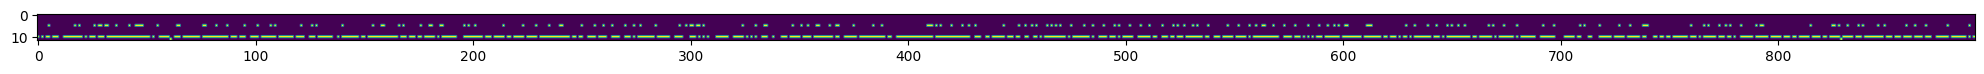

In [4]:
plt.figure(figsize=(25, 6))
plt.imshow(df.isna().T)

Age has some empty value. I will fill it with avarage numbers.
Only some people has Cabin. I will change the value to 1 if have and 0 if not.

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'] = np.where(pd.isnull(df["Cabin"]),0,1)
df = df.dropna()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### I create a function for heatmap, because i will use it often

In [6]:
def create_heatmap(df, column1, column2):
    """
    input: pandas Dataframe, columns need to heatmap
    return: unstacked grouped dataframe
    descript: This function is count values based on two columns, then create a heatmap with formated numbers.
    """
    heatmapdf = df[[column1, column2]].groupby(column1).value_counts().unstack()
    sns.heatmap(heatmapdf, annot=True,fmt='g')
    return heatmapdf

### Heatmap for Survived and classes

The surviving rate increase by the class. (1st is the best)

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


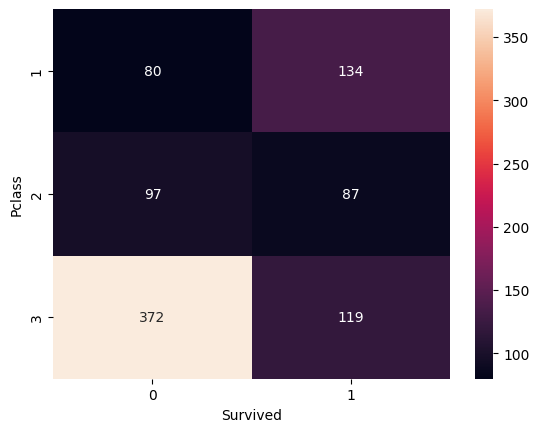

In [7]:
pclass_survived = create_heatmap(df,'Pclass', 'Survived')
pclass_survived

#### Check the Age and Pclass relationship

In the first class the avarage Age is higher then the other classes.

<AxesSubplot: title={'center': 'Age'}, xlabel='[Pclass]'>

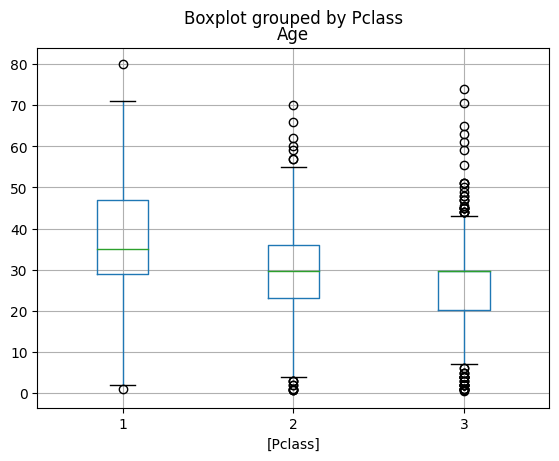

In [8]:
agedf = df[['Pclass', 'Age']]
agedf.boxplot(column='Age', by=['Pclass'])

In [9]:
corr = df.corr()
corr

C:\Users\deuts\AppData\Local\Temp\ipykernel_4928\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703,0.020045
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,0.313435
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,-0.723815
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,0.228384
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,-0.038657
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,0.039101
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,0.480425
Cabin,0.020045,0.313435,-0.723815,0.228384,-0.038657,0.039101,0.480425,1.000000


#### Correlation map

The Correlation map goal is check which two variable correlate best eachother. 

Results: 
    Pclass and Cabin is highest.
    Pclass and Fare
    Pclass and Cabin seems to important.

<AxesSubplot: >

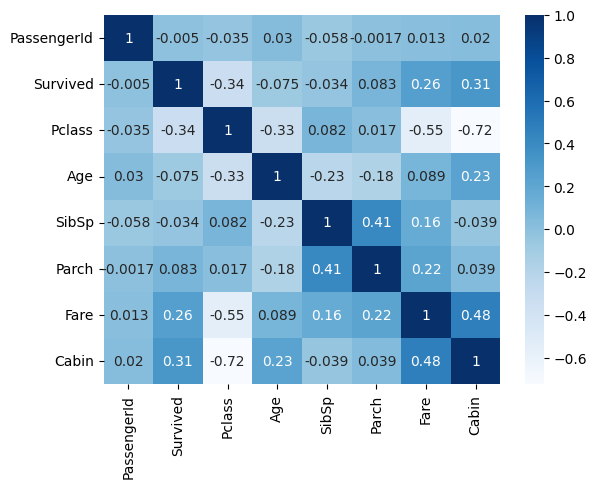

In [10]:
sns.heatmap(corr, cmap="Blues", annot=True)

### Cabin in Pclass

In the first class it has much more cabin than the others.

Cabin,0,1
Pclass,,
1,40,174
2,168,16
3,479,12


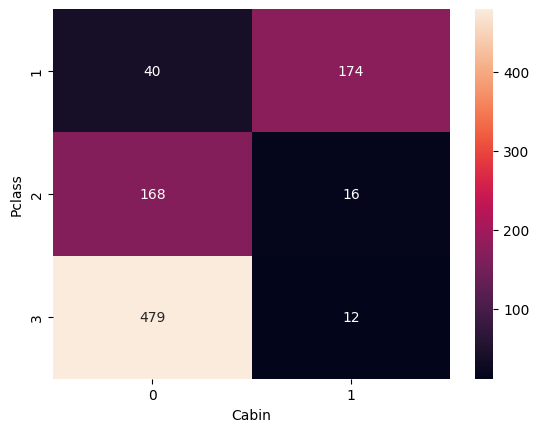

In [11]:
pclasscabin = create_heatmap(df,'Pclass', 'Cabin')
pclasscabin

### Survived with Cabin

The people with cabin has higher survival rate than people that not have.

Cabin,0,1
Survived,,
0,481,68
1,206,134


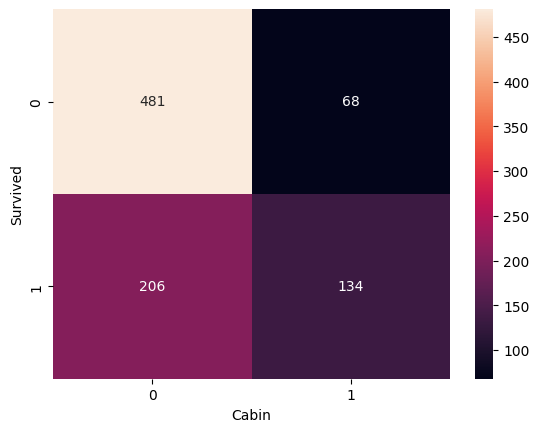

In [12]:
survivedcabin = create_heatmap(df,'Survived', 'Cabin')
survivedcabin

### Location on the ship and survivial rate

Those whose entered on C/Q has higher survival rate than in S

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


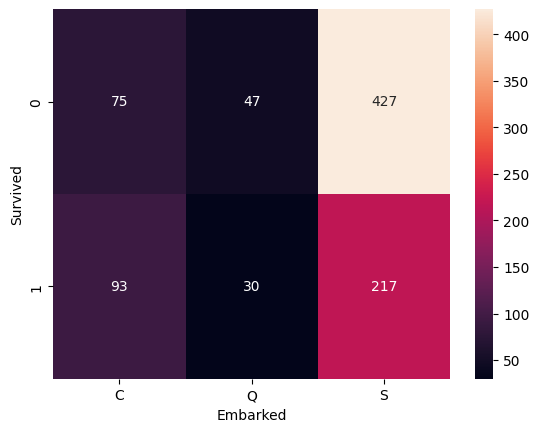

In [13]:
survivedembarked = create_heatmap(df,'Survived', 'Embarked')
survivedembarked